<a href="https://colab.research.google.com/github/not-rudy/Applied-Computational-Methods/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rudy Medrano**

**MAT 421: Applied Computational Methods**


**Estimating Missing Temperature Values Using Interpolation and Regression Methods**

**Introduction:**

**Complete Data:** I will begin by first plotting the relationship between what ***Month*** it is, and what the ***Anamoly*** is at that month.

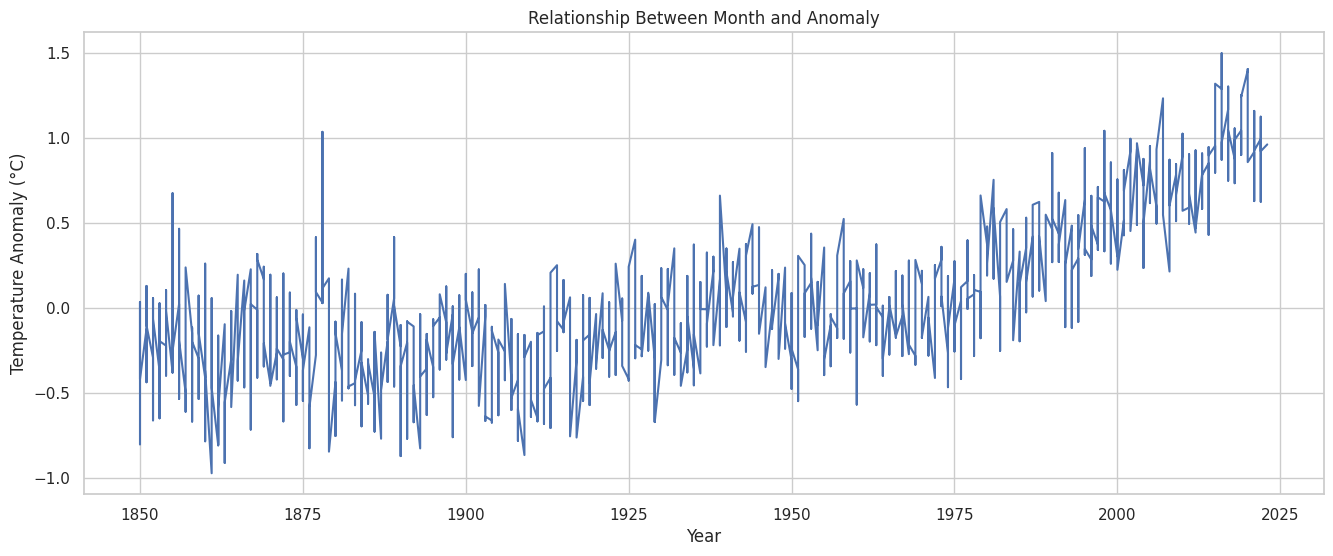

In [ ]:
## Plotting the Relationship between Month and Anomaly

## Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Initialize Data
data = pd.read_csv("/content/Global Temperatures.csv")
data.head()

Months =  data['Month'] # Months Since January 1850
Anomaly = data['Month Anomaly'] # Temperature Anomaly
Years = data['Year']

## Plotting Relationship Between Month and Anomaly
plt.plot(Years, Anomaly)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Relationship Between Month and Anomaly')
plt.show()

As seen above, the Anomaly seems to increase with time. This demonstrates that in comparison to 1850, the climate seems to be getting warmer and warmer as the years go by. This can be simply due to a variety of factors. Climate Change and Global Warming seem to be the main contributors to the increasing Anomaly.

**Removing Data and Implimenting Interpolation Techniques**

To properly measure the accuracy of the different interpolation methods, I will randomly remove 10% of the data from the dataset. I will then impliment the desired interpolation method and evaluate it's Mean Squared Error (MSE) in comparison to the True value.

Initially, the goal was to impliment **Lagrange Polynomial Interpolation** techniques to analyze the data. However, large datasets are unfit to use with Lagrange Interpolation. This is due to Computational Cost, Numerical Instability, and Memory Usage.

**Lagrange Interpolation Unfit for Larger Datasets**

Lagrange Polynomial Interpolation is not ideal for huge datasets because of its Complexity, Numerical Instability, and Memory Usage. Lagrange interpolity has O(n^2) complexity. High-degree polynomials can oscillate wildly between points as is demonstrated in our dataset. This is what is known as Runge's phenomenon. The storing and computing of larger polynomial terms becomes inefficient and uses too much memory.

For the purpose of this Experiment, I will be using a different technique: Linear Interpolation

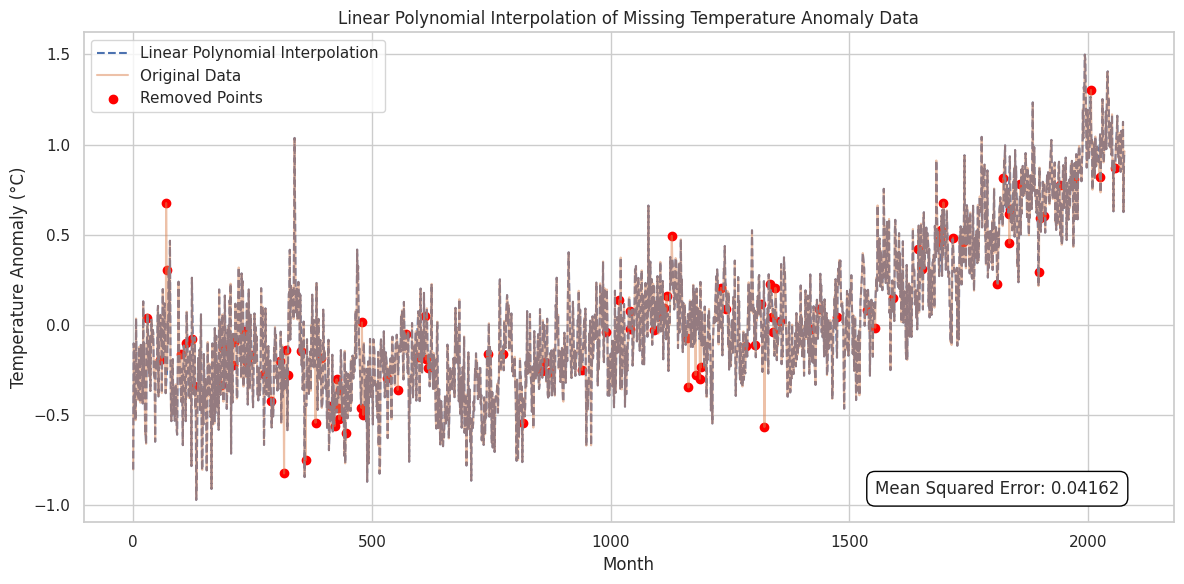

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/Global Temperatures.csv")

# Extract relevant columns
Month = data['Month'].to_numpy()  # Already numerical: 1 to 2077
Anomaly = data['Month Anomaly'].copy()

# Randomly remove 5% of the data
np.random.seed(42)
missing_indices = np.random.choice(len(Anomaly), size=int(0.05 * len(Anomaly)), replace=False)
Anomaly_missing = Anomaly.copy()
Anomaly_missing.iloc[missing_indices] = np.nan  # Correctly set missing values

# Linear Polynomial Interpolation
valid = ~Anomaly_missing.isna()  # Boolean array for non-missing data
x_valid = Month[valid]
y_valid = Anomaly_missing[valid]

# Perform linear interpolation using interp1d
linear_interp = interp1d(x_valid, y_valid, kind='linear', fill_value="extrapolate")

# Interpolating missing values
Anomaly_interp = Anomaly_missing.copy()
Anomaly_interp.iloc[missing_indices] = linear_interp(Month[missing_indices])

# Calculate the Mean Squared Error
mse = mean_squared_error(Anomaly.iloc[missing_indices], Anomaly_interp.iloc[missing_indices])

# Plot Results
plt.figure(figsize=(12, 6))

# Plot the linear interpolation
x_new = np.arange(Month.min(), Month.max(), 0.01)  # Smaller increment for smoother curves
plt.plot(x_new, linear_interp(x_new), label="Linear Polynomial Interpolation", linestyle="--")

# Plot original and missing data
plt.plot(Month, Anomaly, label="Original Data", alpha=0.5)
plt.scatter(Month[missing_indices], Anomaly[missing_indices], color='red', label="Removed Points")

# Display MSE on the plot
plt.text(0.95, 0.05, f'Mean Squared Error: {mse:.5f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Labeling the plot
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Linear Polynomial Interpolation of Missing Temperature Anomaly Data")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


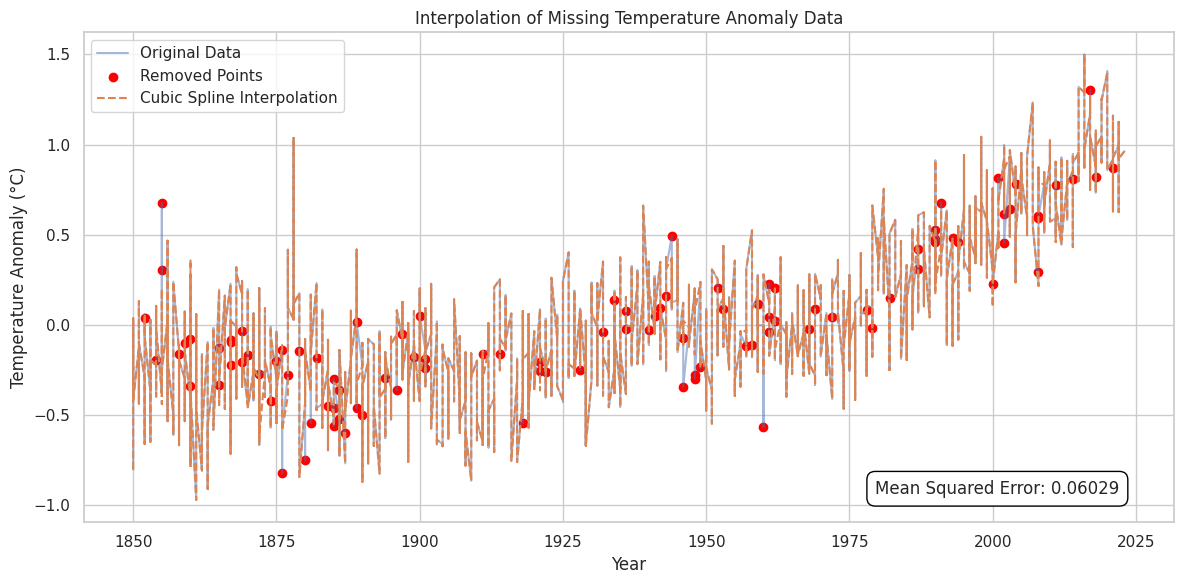

In [ ]:
## Using Cubic Spline Interpolation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/Global Temperatures.csv")

# Extract relevant columns
Month = data['Month'].to_numpy()  # Already numerical: 1 to 2077
Anomaly = data['Month Anomaly'].copy()
Years = data['Year']

# Randomly remove 10% of the data
np.random.seed(42)
missing_indices = np.random.choice(len(Anomaly), size=int(0.05 * len(Anomaly)), replace=False)
Anomaly_missing = Anomaly.copy()
Anomaly_missing.iloc[missing_indices] = np.nan

# Interpolation using Cubic Spline (based on valid points only)
valid = ~Anomaly_missing.isna()
cs_interp = CubicSpline(Month[valid], Anomaly_missing[valid])

# Fill in missing values
Anomaly_interp = Anomaly_missing.copy()
Anomaly_interp.iloc[missing_indices] = cs_interp(Month[missing_indices])

# Evaluate interpolation error only on the missing values
mse = mean_squared_error(Anomaly[missing_indices], Anomaly_interp[missing_indices])

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(Years, Anomaly, label="Original Data", alpha=0.5)
plt.scatter(Years[missing_indices], Anomaly[missing_indices], color='red', label="Removed Points")
plt.plot(Years, Anomaly_interp, label="Cubic Spline Interpolation", linestyle="--")
plt.text(0.95, 0.05, f'Mean Squared Error: {mse:.5f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Interpolation of Missing Temperature Anomaly Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


As demonstrated, the Mean Squared Error for

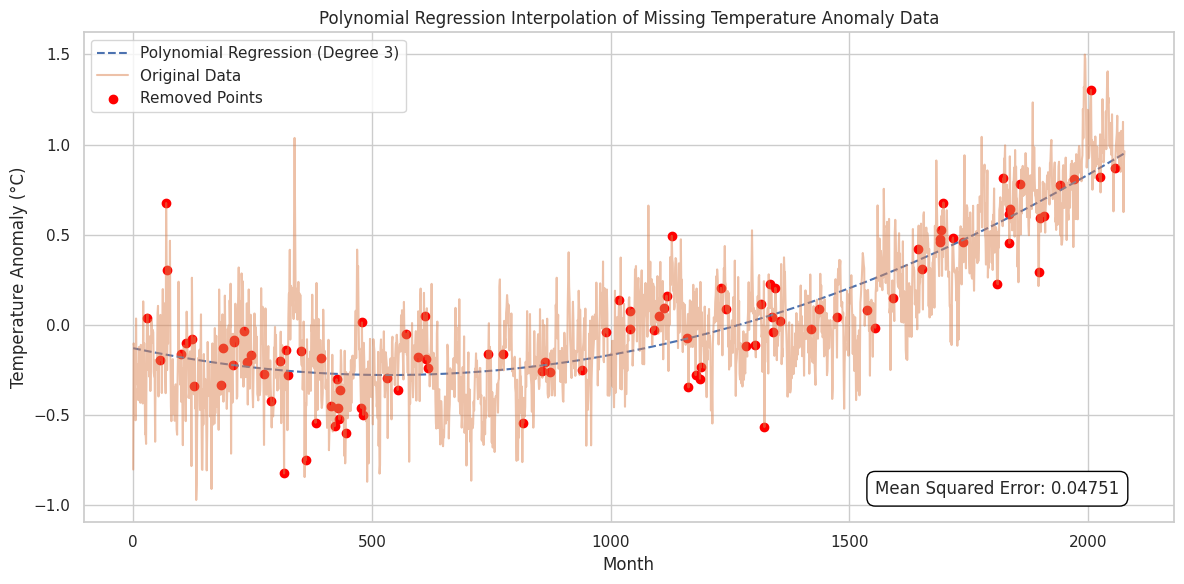

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/Global Temperatures.csv")

# Extract relevant columns
Month = data['Month'].to_numpy()  # Already numerical: 1 to 2077
Anomaly = data['Month Anomaly'].copy()

# Randomly remove 5% of the data
np.random.seed(42)
missing_indices = np.random.choice(len(Anomaly), size=int(0.05 * len(Anomaly)), replace=False)
Anomaly_missing = Anomaly.copy()
Anomaly_missing.iloc[missing_indices] = np.nan  # Correctly set missing values

# Polynomial Regression (let's use a degree 3 polynomial as an example)
degree = 2

# Select valid (non-missing) data for polynomial fitting
valid = ~Anomaly_missing.isna()
x_valid = Month[valid]
y_valid = Anomaly_missing[valid]

# Fit a polynomial regression model
coefficients = np.polyfit(x_valid, y_valid, degree)
poly_model = np.poly1d(coefficients)

# Predict missing values using the polynomial model
x_interp = Month[missing_indices]
Anomaly_interp = Anomaly_missing.copy()
Anomaly_interp.iloc[missing_indices] = poly_model(x_interp)

# Calculate the Mean Squared Error for the interpolation
mse = mean_squared_error(Anomaly.iloc[missing_indices], Anomaly_interp.iloc[missing_indices])

# Plot Results
plt.figure(figsize=(12, 6))

# Plot the polynomial regression curve
x_new = np.arange(Month.min(), Month.max(), 0.01)  # Smaller increment for smoother curves
plt.plot(x_new, poly_model(x_new), label="Polynomial Regression (Degree 3)", linestyle="--")

# Plot original and missing data
plt.plot(Month, Anomaly, label="Original Data", alpha=0.5)
plt.scatter(Month[missing_indices], Anomaly[missing_indices], color='red', label="Removed Points")

# Display MSE on the plot
plt.text(0.95, 0.05, f'Mean Squared Error: {mse:.5f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Labeling the plot
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Polynomial Regression Interpolation of Missing Temperature Anomaly Data")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
